In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import (datasets, naive_bayes, neighbors, neural_network, model_selection, svm)

In [27]:
filename = "C:\\Users\\jakes\\x_train.txt"
S_in = np.loadtxt(filename, delimiter=',')
temp = S_in

filename = "C:\\Users\\jakes\\y_train.txt"
S_inY = np.loadtxt(filename, delimiter=',')
tempY = S_inY

filename = "C:\\Users\\jakes\\x_test.txt"
S_out = np.loadtxt(filename, delimiter=',')
tempO = S_out

filename = "C:\\Users\\jakes\\y_test.txt"
S_outY = np.loadtxt(filename, delimiter=',')
tempOY = S_outY

### Normalizing

In [28]:
[N,dim]=np.shape(S_in)

S_in = temp
S_inY = tempY

S_out = tempO
S_outY = tempOY

for i in range(dim):
    mean = np.mean(S_in[:,i])
    S_in[:,i] = S_in[:,i] - mean
    
    std = np.std(S_in[:,i])
    S_in[:,i] = S_in[:,i] / std

    S_out[:,i] = S_out[:,i] - mean
    S_out[:,i] = S_out[:,i] / std
    
    
#Reshaping data

S_inR = S_in
S_outR = S_out

S_inR = np.reshape(S_in, (len(S_in), 32,32,3))
S_outR = np.reshape(S_out, (len(S_out), 32,32,3))

# Using first SVM model

In [29]:
clf=svm.SVC(kernel='rbf', C=1)
clf.fit(S_in, S_inY)
gtest=clf.predict(S_out)
sv=clf.support_vectors_

tt=np.linspace(-2,2)

q=3
Ytt=3.7*(tt+2)**q/(1+(tt+2)**q)-2

[SVs, _] = sv.shape;
Eout=np.mean(S_outY!=gtest)
print("Eout         : %.1f"% (Eout*100), "%")
print("SV  estimate : %.1f"%(np.sum(clf.n_support_)*100/(N-1)), "%")
print("Number of support vectors:", SVs)

Eout         : 45.2 %
SV  estimate : 88.8 %
Number of support vectors: 44387


In [ ]:
import pickle

with open('FinalSVMModel', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(clf, f, pickle.HIGHEST_PROTOCOL)

# CNNs

### 10e-7

In [5]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.L1(l1=1e-7)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-7)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-7)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-7)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-7)),
    tf.keras.layers.Dense(10),
])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model2.fit(S_inR, S_inY, epochs=20,
                   validation_data=(S_outR, S_outY))

model2.save('Final_CNN_Model')

Epoch 1/20
1563/1563 [==============================] - 22s 13ms/step - loss: 1.3944 - accuracy: 0.4949 - val_loss: 1.1250 - val_accuracy: 0.6091
Epoch 2/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9951 - accuracy: 0.6513 - val_loss: 0.9458 - val_accuracy: 0.6715
Epoch 3/20
1563/1563 [==============================] - 21s 14ms/step - loss: 0.8350 - accuracy: 0.7082 - val_loss: 0.8897 - val_accuracy: 0.6936
Epoch 4/20
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7270 - accuracy: 0.7454 - val_loss: 0.8593 - val_accuracy: 0.7111
Epoch 5/20
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6446 - accuracy: 0.7763 - val_loss: 0.8432 - val_accuracy: 0.7222
Epoch 6/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5794 - accuracy: 0.8000 - val_loss: 0.8288 - val_accuracy: 0.7271
Epoch 7/20
1563/1563 [==============================] - 19s 12ms/step - loss: 0.5201 - accuracy: 0.8173 - val_loss: 0.8400 -

INFO:tensorflow:Assets written to: Final_CNN_Model_2\assets


INFO:tensorflow:Assets written to: Final_CNN_Model_2\assets


In [6]:
model2acc = history.history['accuracy']
model2valAcc = history.history['val_accuracy']
model2valLoss = history.history['val_loss']

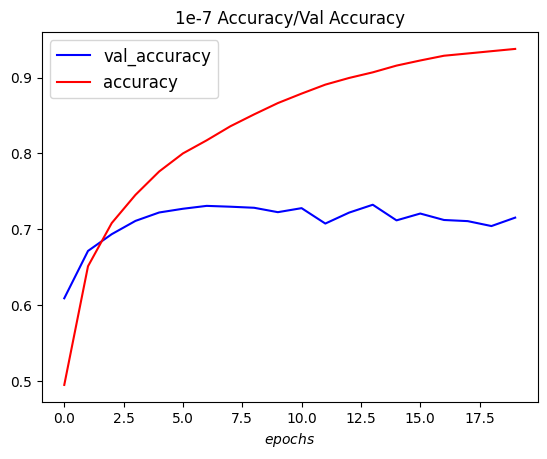

In [7]:
f, ax=plt.subplots()
ax.title.set_text("1e-7 Accuracy/Val Accuracy")
ax.plot(model2valAcc, label="val_accuracy", color='b')
ax.plot(model2acc, label="accuracy", color='r')
ax.set_xlabel("$epochs$")
ax.legend(fontsize=12)

In [22]:
m2pred = model2.predict(S_outR)

err = tf.keras.losses.SparseCategoricalCrossentropy()

m2Eout = err(S_outY, m2pred)

print(m2Eout)

313/313 [==============================] - 1s 4ms/step
tf.Tensor(1.95693, shape=(), dtype=float32)


In [19]:
m2Acc = (S_outY==m2_pred.argmax(axis=1)).sum()/S_outY.shape[0]

In [20]:
print(m2Acc)

0.7154


In [23]:
np.mean(model2acc)

0.8347340017557144

In [24]:
m2predIn = model2.predict(S_inR)

err = tf.keras.losses.SparseCategoricalCrossentropy()

m2Ein = err(S_inY, m2predIn)

print(m2Ein)

1563/1563 [==============================] - 7s 4ms/step
tf.Tensor(1.1651019, shape=(), dtype=float32)


# Comparing with new gamma value

### Graphing


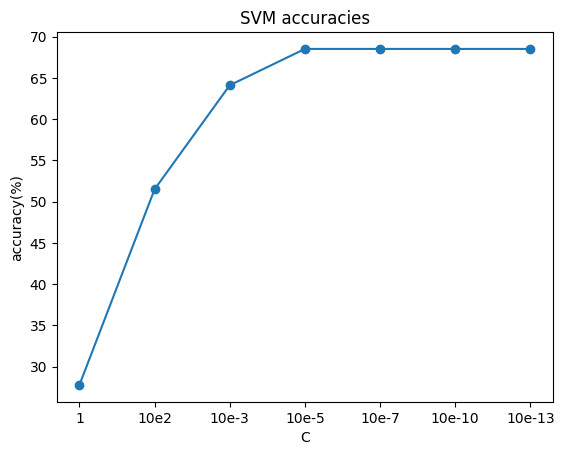

In [26]:
models = ["1", "10e2", "10e-3", "10e-5", "10e-7", "10e-10", "10e-13"]
accuracies = [27.8, 51.5, 64.1, 68.5, 68.5, 68.5, 68.5]

plt.scatter(models,accuracies)
plt.plot(models, accuracies)
plt.xlabel("C")
plt.ylabel("accuracy(%)")
plt.title("SVM accuracies")
plt.show()